In [7]:
# !pip install cv2
import os
import cv2
from matplotlib import pyplot as plt

proj_path = os.getcwd()

q1_10_image_path = os.path.join(proj_path, "Question_01_10", "imori.jpg")
print("Image path:", q1_10_image_path)  # 检查路径

q1_10_image_noise_path = os.path.join(proj_path, "Question_01_10", "imori_noise.jpg")
print("Noisy image path:", q1_10_image_noise_path)  # 检查路径

Image path: /Users/sakura/Documents/書類 - /LiveInJapan(2019/2025/0工作/ABIST/git源代码/Gasyori100knock-ying/Question_01_10/imori.jpg
Noisy image path: /Users/sakura/Documents/書類 - /LiveInJapan(2019/2025/0工作/ABIST/git源代码/Gasyori100knock-ying/Question_01_10/imori_noise.jpg


1 read file

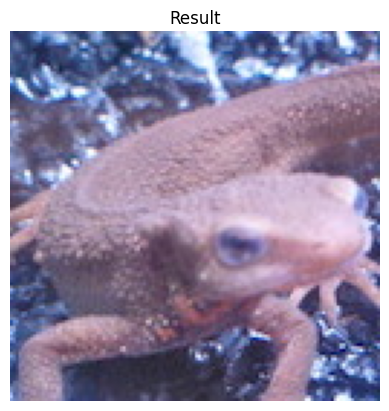

In [8]:
# img_path = os.path.join(proj_path, "imori.jpg")


img = cv2.imread(q1_10_image_path, cv2.IMREAD_UNCHANGED)

# 兼容三/四通道
if img.ndim == 3 and img.shape[2] == 3:
    img_show = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
elif img.ndim == 3 and img.shape[2] == 4:
    img_show = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)
else:
    img_show = img  # 灰度

# 用 matplotlib 显示
# 因为 OpenCV 默认读入的通道顺序是 BGR，而你用 matplotlib.pyplot.imshow() 显示时，它会按 RGB 去解释每个通道。
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Result")
plt.axis("off")  # 不显示坐标轴
plt.show()

question 1 change rbg to bgr

Round-trip back to original: True


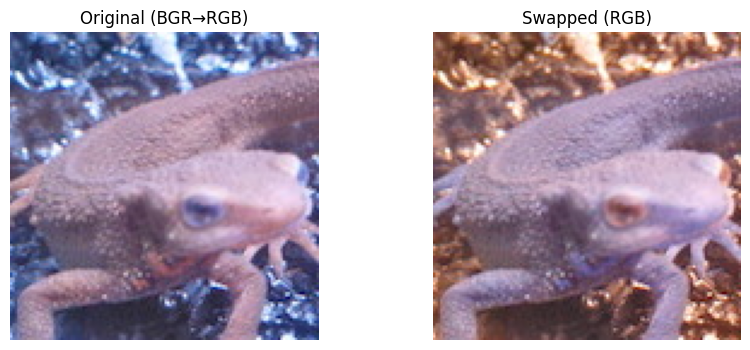

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def swap_rb(img):
    """无副作用地交换 R 和 B；3通道或4通道都支持。"""
    if img.ndim != 3:
        return img.copy()
    if img.shape[2] == 3:
        return img[..., [2, 1, 0]].copy()  # BGR <-> RGB
    elif img.shape[2] == 4:
        return img[..., [2, 1, 0, 3]].copy()  # BGRA <-> RGBA
    else:
        return img.copy()


# 1) 读入：OpenCV 默认 BGR
img_bgr = cv2.imread(q1_10_image_path, cv2.IMREAD_UNCHANGED)

# 2) 交换一次：得到“RGB 等价图”
img_rgb = swap_rb(img_bgr)

# 3) 再交换一次：应当回到原始 BGR
img_bgr_roundtrip = swap_rb(img_rgb)

# 4) 自检：是否完全一致
print("Round-trip back to original:", np.array_equal(img_bgr, img_bgr_roundtrip))

# 5) 显示（关键：BGR 要先转成 RGB；RGB 直接显示）
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.title("Original (BGR→RGB)")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(img_bgr_roundtrip)
plt.title("Swapped (RGB)")
plt.axis("off")
plt.show()

question 2 change rbg to gray

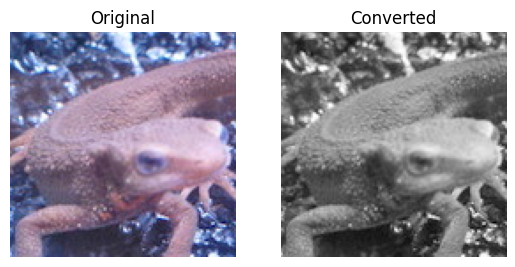

In [10]:
def RGB2GRAY(img):
    r = img[:, :, 0].copy()
    g = img[:, :, 1].copy()
    b = img[:, :, 2].copy()

    gray = 0.299 * r + 0.587 * g + 0.114 * b
    gray = gray.astype("uint8")
    return gray


if __name__ == "__main__":
    # Read image
    img = cv2.imread(q1_10_image_path)

    # RGB -> GRAY
    img2 = RGB2GRAY(img.copy())  # cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # ---- 显示对比 ----
    # 原图
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    plt.title("Original")
    plt.axis("off")
    # 转换后图像
    plt.subplot(1, 2, 2)
    plt.imshow(img2, cmap="gray")
    plt.title("Converted")
    plt.axis("off")
    plt.show()

Q.3. 二値化

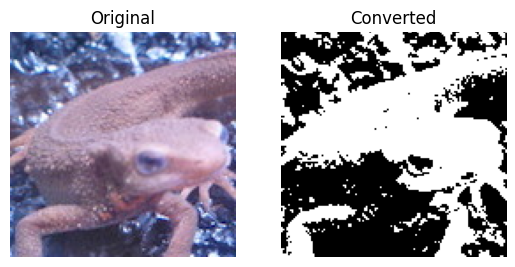

In [11]:
def RGB2binary(img, threshold=128):
    gray = RGB2GRAY(img)

    binary = gray.copy()
    binary[binary >= threshold] = 255
    binary[binary < threshold] = 0
    return binary


if __name__ == "__main__":
    # Read image
    img = cv2.imread(q1_10_image_path)

    # RGB -> BINARY
    img2 = RGB2binary(img.copy(), threshold=128)

    # ---- 显示对比 ----
    # 原图
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    plt.title("Original")
    plt.axis("off")
    # 转换后图像
    plt.subplot(1, 2, 2)
    plt.imshow(img2, cmap="gray")
    plt.title("Converted")
    plt.axis("off")
    plt.show()

Q.4. 大津の二値化

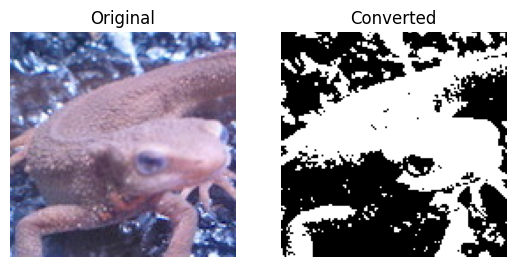

In [ ]:
def RGB2otsuiBinary(img, threshold=128):
    gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
    otsui_binary = gray.copy()
    otsui_binary[otsui_binary >= threshold] = 255
    otsui_binary[otsui_binary < threshold] = 0
    return otsui_binary


if __name__ == "__main__":
    # Read image
    img = cv2.imread(q1_10_image_path)

    # RGB -> Otsui BINARY
    img2 = RGB2otsuiBinary(img.copy(), threshold=128)

    # ---- 显示对比 ----
    # 原图
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original")
    plt.axis("off")
    # 转换后图像
    plt.subplot(1, 2, 2)
    plt.imshow(img2, cmap="gray")
    plt.title("Converted")
    plt.axis("off")
    plt.show()

Q.5. HSV変換
Max = max(R,G,B)
Min = min(R,G,B)

H =  { 0                            (if Min=Max)
       60 x (G-R) / (Max-Min) + 60  (if Min=B)
       60 x (B-G) / (Max-Min) + 180 (if Min=R)
       60 x (R-B) / (Max-Min) + 300 (if Min=G)
       
V = Max

S = Max - Min
---------------------
C = S

H' = H / 60

X = C (1 - |H' mod 2 - 1|)

(R,G,B) = (V - C) (1,1,1) + { (0, 0, 0)  (if H is undefined)
                              (C, X, 0)  (if 0 <= H' < 1)
                              (X, C, 0)  (if 1 <= H' < 2)
                              (0, C, X)  (if 2 <= H' < 3)
                              (0, X, C)  (if 3 <= H' < 4)
                              (X, 0, C)  (if 4 <= H' < 5)
                              (C, 0, X)  (if 5 <= H' < 6)

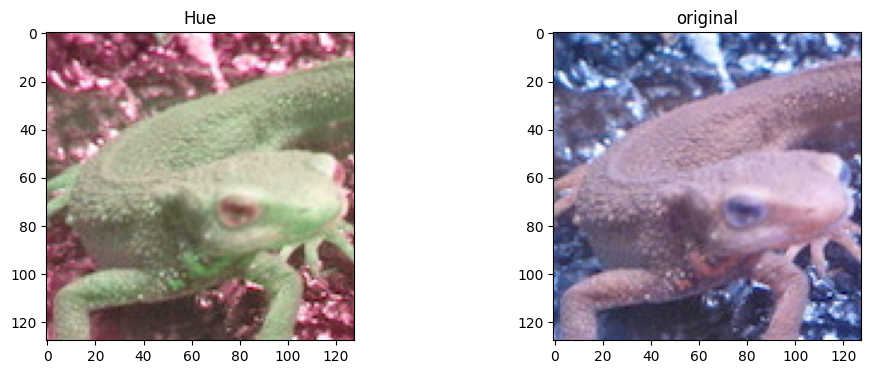

In [ ]:
import numpy as np


def RGB2HSV(img):
    R = img[:, :, 0] / 255.0
    G = img[:, :, 1] / 255.0
    B = img[:, :, 2] / 255.0

    Max = np.maximum(np.maximum(R, G), B)
    Min = np.minimum(np.minimum(R, G), B)
    diff = Max - Min

    H = np.zeros_like(Max)

    # Hue
    mask = diff != 0
    mask_r = (Max == R) & mask
    mask_g = (Max == G) & mask
    mask_b = (Max == B) & mask

    H[mask_r] = (60 * ((G[mask_r] - B[mask_r]) / diff[mask_r]) + 0) % 360
    H[mask_g] = (60 * ((B[mask_g] - R[mask_g]) / diff[mask_g]) + 120) % 360
    H[mask_b] = (60 * ((R[mask_b] - G[mask_b]) / diff[mask_b]) + 240) % 360

    # Saturation
    S = np.zeros_like(Max)
    S[Max != 0] = diff[Max != 0] / Max[Max != 0]

    # Value
    V = Max

    hsv = np.dstack((H, S, V))
    return hsv


def HSV2RGB(hsv):
    H, S, V = hsv[..., 0], hsv[..., 1], hsv[..., 2]
    C = S * V
    H_ = H / 60.0
    X = C * (1 - np.abs(H_ % 2 - 1))
    m = V - C

    rgb = np.zeros((*H.shape, 3), dtype=np.float32)
    Z = np.zeros_like(H, dtype=np.float32)

    conds = [
        (0 <= H_) & (H_ < 1),
        (1 <= H_) & (H_ < 2),
        (2 <= H_) & (H_ < 3),
        (3 <= H_) & (H_ < 4),
        (4 <= H_) & (H_ < 5),
        (5 <= H_) & (H_ < 6),
    ]
    colors = [(C, X, Z), (X, C, Z), (Z, C, X), (Z, X, C), (X, Z, C), (C, Z, X)]

    for cond, (r, g, b) in zip(conds, colors):
        rgb[..., 0][cond] = (r + m)[cond]
        rgb[..., 1][cond] = (g + m)[cond]
        rgb[..., 2][cond] = (b + m)[cond]

    rgb = np.clip(rgb * 255.0, 0, 255).astype(np.uint8)
    return rgb


if __name__ == "__main__":
    # Read image
    img = cv2.imread(q1_10_image_path)

    # 1) 读入：OpenCV 默认 BGR
    img_bgr = cv2.imread(q1_10_image_path, cv2.IMREAD_UNCHANGED)

    # 2) 交换一次：得到“RGB 等价图”
    img_rgb = swap_rb(img_bgr)

    hsv = RGB2HSV(img_rgb.copy())

    hsv[..., 0] = (hsv[..., 0] + 120) % 360
    # hsv[...,1] =  (hsv[...,1] + 120) % 360
    # S = hsv[..., 1]
    # V = hsv[..., 2]

    out = HSV2RGB(hsv.copy())

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(out, cmap="hsv")
    plt.title("Hue")
    plt.subplot(1, 2, 2)
    plt.imshow(img_rgb)
    plt.title("original")
    plt.show()

Q.6. 減色処理

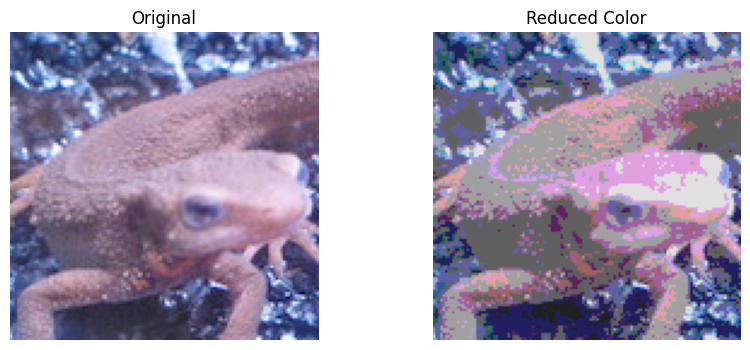

In [14]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


def reduce_color(img):
    """将图像像素值量化为 {32, 96, 160, 224} 四档"""
    img = img.astype(np.uint8, copy=False)
    out = np.zeros_like(img, dtype=np.uint8)

    if img.ndim == 3:  # 彩色图像
        for i in range(3):
            channel = img[..., i]
            reduced = np.select(
                [
                    (channel < 64),
                    (channel >= 64) & (channel < 128),
                    (channel >= 128) & (channel < 192),
                    (channel >= 192),
                ],
                [np.uint8(32), np.uint8(96), np.uint8(160), np.uint8(224)],
                default=channel,
            )
            out[..., i] = reduced.astype(np.uint8, copy=False)
    else:  # 灰度图
        out = np.select(
            [
                (img < 64),
                (img >= 64) & (img < 128),
                (img >= 128) & (img < 192),
                (img >= 192),
            ],
            [np.uint8(32), np.uint8(96), np.uint8(160), np.uint8(224)],
            default=img,
        ).astype(np.uint8, copy=False)
    return out


# ========== 示例 ==========
if __name__ == "__main__":
    # img_path = "imori.jpg"
    img_bgr = cv2.imread(q1_10_image_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original")
    plt.axis("off")

    out = reduce_color(img_rgb.copy())
    plt.subplot(1, 2, 2)
    plt.imshow(out)
    plt.title("Reduced Color")
    plt.axis("off")
    plt.show()

Q7平均プーリング
v = 1/|R| * Sum_{i in R} v_i
ここではimori.jpgは128x128なので、8x8にグリッド分割し、平均プーリングせよ。

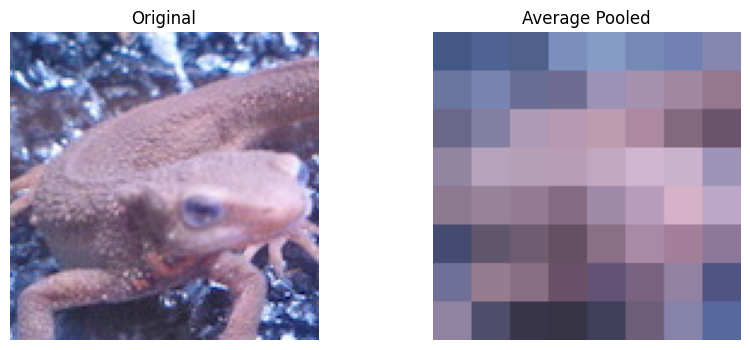

In [15]:
def average_pool_image(arr: np.ndarray, n_rows: int = 8, n_cols: int = 8) -> np.ndarray:
    """将图像按 n_rows×n_cols 网格做平均池化，支持 RGB/灰度。"""
    if arr.ndim == 2:  # 灰度 -> 增加通道轴
        arr = arr[..., None]
    H, W, C = arr.shape
    out = arr.astype(np.float32).copy()
    cell_h, cell_w = H // n_rows, W // n_cols

    for r in range(n_rows):
        y0 = r * cell_h
        y1 = (r + 1) * cell_h if r < n_rows - 1 else H
        for c in range(n_cols):
            x0 = c * cell_w
            x1 = (c + 1) * cell_w if c < n_cols - 1 else W
            blk = out[y0:y1, x0:x1, :]
            mean = blk.mean(axis=(0, 1), keepdims=True)
            out[y0:y1, x0:x1, :] = mean

    out = np.clip(out, 0, 255).astype(np.uint8)
    return out[..., 0] if out.shape[2] == 1 else out


if __name__ == "__main__":
    img_bgr = cv2.imread(q1_10_image_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original")
    plt.axis("off")

    out = average_pool_image(img_rgb.copy(), n_rows=8, n_cols=8)
    plt.subplot(1, 2, 2)
    plt.imshow(out)
    plt.title("Average Pooled")
    plt.axis("off")
    plt.show()

Q8 Max Pooling

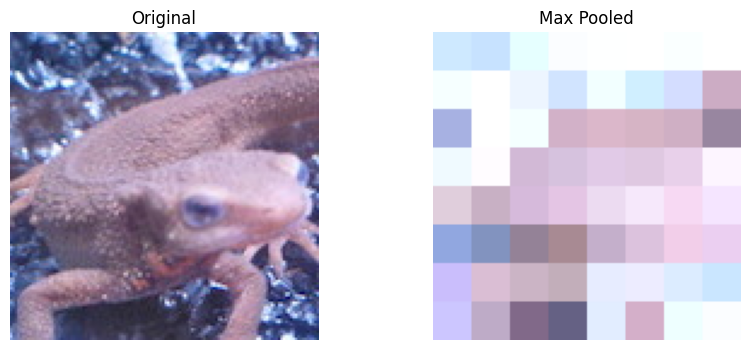

In [16]:
def max_pool_image(arr, n_rows=8, n_cols=8, out_path=None):
    """
    对图像执行最大池化（Max Pooling）
    n_rows × n_cols 表示网格划分数
    """
    if arr.ndim == 2:  # 灰度 -> 增加通道轴
        arr = arr[..., None]
    H, W, C = arr.shape
    out = np.zeros_like(arr)
    cell_h, cell_w = H // n_rows, W // n_cols

    for r in range(n_rows):
        for c in range(n_cols):
            y0, y1 = r * cell_h, (r + 1) * cell_h if r < n_rows - 1 else H
            x0, x1 = c * cell_w, (c + 1) * cell_w if c < n_cols - 1 else W
            block = arr[y0:y1, x0:x1, :]
            val = block.max(axis=(0, 1))
            out[y0:y1, x0:x1, :] = val

    out = np.clip(out, 0, 255).astype(np.uint8)
    return out


if __name__ == "__main__":
    img_bgr = cv2.imread(q1_10_image_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original")
    plt.axis("off")

    out = max_pool_image(img_rgb.copy(), n_rows=8, n_cols=8)
    plt.subplot(1, 2, 2)
    plt.imshow(out)
    plt.title("Max Pooled")
    plt.axis("off")
    plt.show()

Q.9. ガウシアンフィルタ
重み g(x,y,s) = 1/ (2 * pi * sigma * sigma) * exp( - (x^2 + y^2) / (2*s^2))
標準偏差s = 1.3による8近傍ガウシアンフィルタは
            1 2 1
K =  1/16 [ 2 4 2 ]
            1 2 1

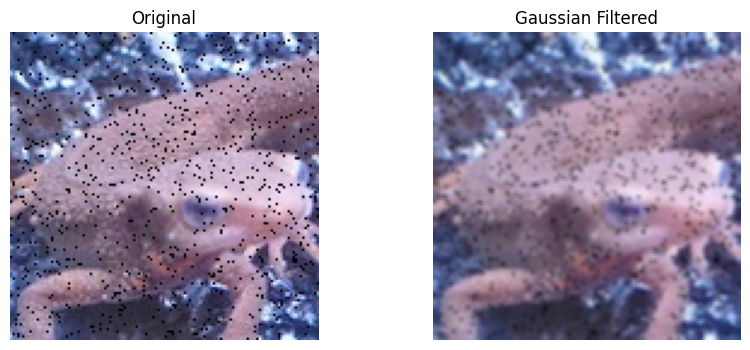

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def gaussian_filter(img, sigma=1.3):
    """
    对图像执行 3×3 高斯滤波，sigma=1.3
    """
    K = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]], dtype=np.float32)
    K /= 16.0  # 归一化
    out = cv2.filter2D(img, -1, K)
    return out


if __name__ == "__main__":
    img_bgr = cv2.imread(q1_10_image_noise_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original")
    plt.axis("off")

    out = gaussian_filter(img_rgb.copy())  # 改成直接返回图像
    plt.subplot(1, 2, 2)
    plt.imshow(out)
    plt.title("Gaussian Filtered")
    plt.axis("off")

    plt.show()

Q.10 メディアンフィルタ

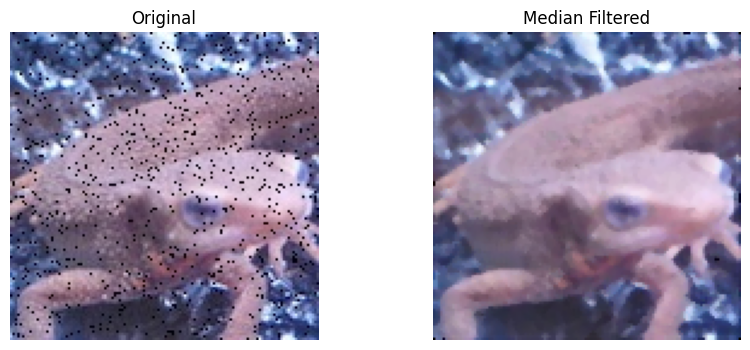

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def median_filter(img):
    """
    对图像执行 3×3 中值滤波（含零填充）
    """
    H, W, C = img.shape
    pad = 1
    out = np.zeros_like(img)
    # 零填充
    padded = np.pad(
        img, ((pad, pad), (pad, pad), (0, 0)), "constant", constant_values=0
    )

    # 逐像素中值处理
    for y in range(H):
        for x in range(W):
            for c in range(C):
                region = padded[y : y + 3, x : x + 3, c].flatten()
                out[y, x, c] = np.median(region)

    return out


if __name__ == "__main__":
    img_bgr = cv2.imread(q1_10_image_noise_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original")
    plt.axis("off")

    out = median_filter(img_rgb)
    plt.subplot(1, 2, 2)
    plt.imshow(out)
    plt.title("Median Filtered")
    plt.axis("off")

    plt.show()

In [ ]:
import os

proj_path = os.getcwd()

q11_20_image_path = os.path.join(proj_path, "Question_11_20", "imori.jpg")
print("Image path:", q11_20_image_path, "→ Exists:", os.path.exists(q11_20_image_path))

q11_20_image_noise_path = os.path.join(proj_path, "Question_11_20", "imori_noise.jpg")
print(
    "Noisy image path:",
    q11_20_image_noise_path,
    "→ Exists:",
    os.path.exists(q11_20_image_noise_path),
)

q11_20_image_dark_path = os.path.join(proj_path, "Question_11_20", "imori_dark.jpg")
print(
    "Dark image path:",
    q11_20_image_dark_path,
    "→ Exists:",
    os.path.exists(q11_20_image_dark_path),
)

# q11_20_image_gamma_path = os.path.join(proj_path, "Question_11_20", "imori_gamma.jpg")
# print("Gamma image path:", q11_20_image_gamma_path, "→ Exists:", os.path.exists(q11_20_image_gamma_path))

Image path: /Users/sakura/Documents/書類 - /LiveInJapan(2019/2025/0工作/ABIST/git源代码/Gasyori100knock-ying/Question_11_20/imori.jpg → Exists: True
Noisy image path: /Users/sakura/Documents/書類 - /LiveInJapan(2019/2025/0工作/ABIST/git源代码/Gasyori100knock-ying/Question_11_20/imori_noise.jpg → Exists: True
Dark image path: /Users/sakura/Documents/書類 - /LiveInJapan(2019/2025/0工作/ABIST/git源代码/Gasyori100knock-ying/Question_11_20/imori_dark.jpg → Exists: True


Q.11. 平滑化フィルタ

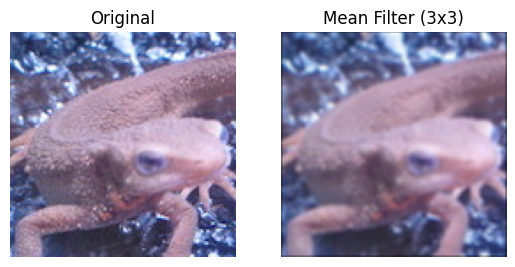

In [27]:
import cv2
import numpy as np


def mean_filter(img):
    """3x3 平滑化フィルタ（平均フィルタ）"""
    H, W, C = img.shape
    out = np.zeros((H, W, C), dtype=np.float32)

    # 零填充（ゼロパディング）
    pad = 1
    img_pad = np.pad(img, ((pad, pad), (pad, pad), (0, 0)), mode="constant")

    # 平滑化滤波（3×3平均）
    for y in range(H):
        for x in range(W):
            for c in range(C):
                out[y, x, c] = np.mean(img_pad[y : y + 3, x : x + 3, c])

    out = np.clip(out, 0, 255)
    return out.astype(np.uint8)


if __name__ == "__main__":
    img = cv2.imread(q11_20_image_path)

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    out = mean_filter(img_rgb)

    import matplotlib.pyplot as plt

    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original")
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(out)
    plt.title("Mean Filter (3x3)")
    plt.axis("off")
    plt.show()

Q.12. モーションフィルタ

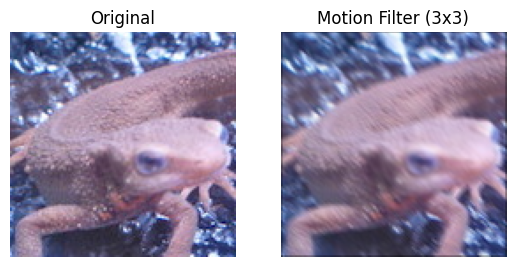

In [28]:
def motion_filter(img):
    """モーションフィルタ(3x3) — 对角方向平均滤波"""
    H, W, C = img.shape
    out = np.zeros((H, W, C), dtype=np.float32)

    # 零填充（ゼロパディング）
    pad = 1
    img_pad = np.pad(img, ((pad, pad), (pad, pad), (0, 0)), mode="constant")

    # フィルタ（3x3対角成分のみ1/3）
    K = np.array([[1 / 3, 0, 0], [0, 1 / 3, 0], [0, 0, 1 / 3]], dtype=np.float32)

    # フィルタリング
    for y in range(H):
        for x in range(W):
            for c in range(C):
                region = img_pad[y : y + 3, x : x + 3, c]
                out[y, x, c] = np.sum(region * K)

    out = np.clip(out, 0, 255)
    return out.astype(np.uint8)


if __name__ == "__main__":
    img = cv2.imread(q11_20_image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    out = motion_filter(img_rgb)

    import matplotlib.pyplot as plt

    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original")
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(out)
    plt.title("Motion Filter (3x3)")
    plt.axis("off")
    plt.show()

Q.13. MAX-MINフィルタ

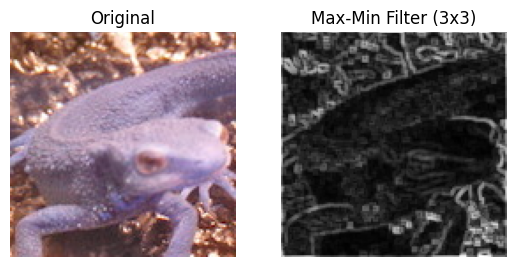

In [29]:
import cv2
import numpy as np


def max_min_filter(img_gray):
    """MAX-MINフィルタ(3x3) — 画素の最大値と最小値の差を出力"""
    H, W = img_gray.shape
    out = np.zeros((H, W), dtype=np.float32)

    # ゼロパディング
    pad = 1
    img_pad = np.pad(img_gray, ((pad, pad), (pad, pad)), mode="constant")

    # フィルタ処理
    for y in range(H):
        for x in range(W):
            region = img_pad[y : y + 3, x : x + 3]
            out[y, x] = np.max(region) - np.min(region)

    out = np.clip(out, 0, 255)
    return out.astype(np.uint8)


if __name__ == "__main__":
    img = cv2.imread(q11_20_image_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    out = max_min_filter(img_gray)

    import matplotlib.pyplot as plt

    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap="gray")
    plt.title("Original")
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(out, cmap="gray")
    plt.title("Max-Min Filter (3x3)")
    plt.axis("off")
    plt.show()

Q.14. 微分フィルタ

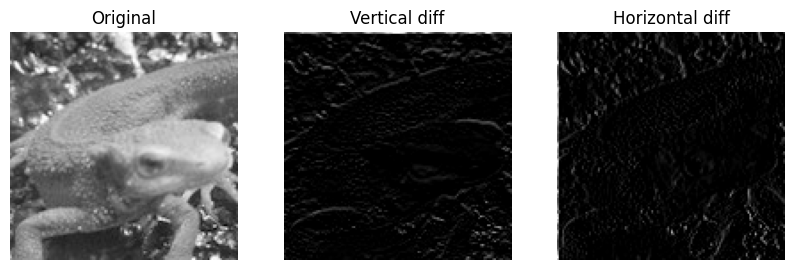

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def differential_filter(img_gray, direction="vertical"):
    """微分フィルタ(3x3)
    direction: 'vertical' または 'horizontal'
    """
    H, W = img_gray.shape
    out = np.zeros((H, W), dtype=np.float32)

    pad = 1
    img_pad = np.pad(img_gray, ((pad, pad), (pad, pad)), mode="constant")

    if direction == "vertical":
        # (a) 縦方向
        K = np.array([[0, -1, 0], [0, 1, 0], [0, 0, 0]], dtype=np.float32)
    elif direction == "horizontal":
        # (b) 横方向
        K = np.array([[0, 0, 0], [-1, 1, 0], [0, 0, 0]], dtype=np.float32)
    else:
        raise ValueError("direction must be 'vertical' or 'horizontal'")

    # フィルタリング
    for y in range(H):
        for x in range(W):
            region = img_pad[y : y + 3, x : x + 3]
            out[y, x] = np.sum(region * K)

    out = np.clip(out, 0, 255)
    return out.astype(np.uint8)


if __name__ == "__main__":
    img = cv2.imread(q11_20_image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError("画像が見つかりません。パスを確認してください。")

    out_v = differential_filter(img, direction="vertical")
    out_h = differential_filter(img, direction="horizontal")

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap="gray")
    plt.title("Original")
    plt.axis("off")
    plt.subplot(1, 3, 2)
    plt.imshow(out_v, cmap="gray")
    plt.title("Vertical diff")
    plt.axis("off")
    plt.subplot(1, 3, 3)
    plt.imshow(out_h, cmap="gray")
    plt.title("Horizontal diff")
    plt.axis("off")
    plt.show()

Q.17. Laplacianフィルタ

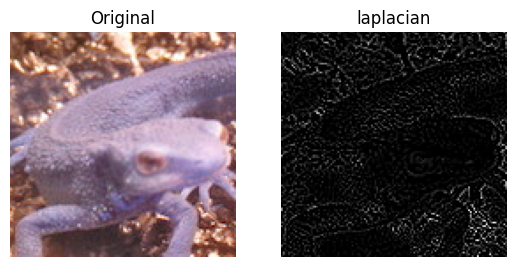

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def laplacian4_numpy(img: np.ndarray) -> np.ndarray:
    """
    4-neighborhood Laplacian:
        [ [0, 1, 0],
          [1,-4, 1],
          [0, 1, 0] ]
    入力: 2D (H,W) グレースケール or 3D (H,W,3) カラー
    戻り: 同サイズ、uint8
    """

    def _lap2d(gray):
        g = gray.astype(np.float32)
        # 反射パディング
        p = np.pad(g, ((1, 1), (1, 1)), mode="reflect")
        # 中心と4近傍をシフトで足し合わせ
        out = (
            p[1:-1, 0:-2]  # 左
            + p[0:-2, 1:-1]  # 上
            + -4 * p[1:-1, 1:-1]  # 中心
            + p[2:, 1:-1]  # 下
            + p[1:-1, 2:]  # 右
        )
        # 結果を0-255に収める（可視化用）
        out = np.clip(out, 0, 255).astype(np.uint8)
        return out

    if img.ndim == 2:
        return _lap2d(img)
    elif img.ndim == 3 and img.shape[2] in (3, 4):
        ch = [_lap2d(img[..., c]) for c in range(img.shape[2])]
        return np.stack(ch, axis=-1)
    else:
        raise ValueError("img must be (H,W) or (H,W,C)")


if __name__ == "__main__":
    img = cv2.imread(q11_20_image_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    out = laplacian4_numpy(img_gray)

    import matplotlib.pyplot as plt

    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap="gray")
    plt.title("Original")
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(out, cmap="gray")
    plt.title("laplacian")
    plt.axis("off")
    plt.show()

Q.18. Embossフィルタ

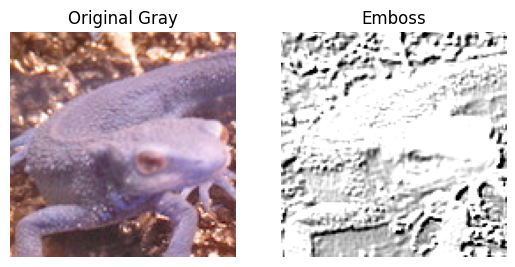

In [33]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


def emboss_numpy(img, offset=128.0, scale=1.0):
    """
    Embossフィルタ（課題カーネル）
    - 入力: (H,W) uint8 グレースケール想定
    - 出力: (H,W) uint8
    """
    # ここが重要：float32に変換
    g = img.astype(np.float32)

    # 反射パディング
    p = np.pad(g, ((1, 1), (1, 1)), mode="reflect")

    # カーネル適用（課題どおり）
    out = (
        -2 * p[0:-2, 0:-2]
        + -1 * p[0:-2, 1:-1]
        + 0 * p[0:-2, 2:]
        + -1 * p[1:-1, 0:-2]
        + 1 * p[1:-1, 1:-1]
        + 1 * p[1:-1, 2:]
        + 0 * p[2:, 0:-2]
        + 1 * p[2:, 1:-1]
        + 2 * p[2:, 2:]
    )

    # スケールしてオフセット（エンボスの見栄え用）
    out = scale * out + offset
    # 表示用に0-255へクリップしてuint8へ
    out = np.clip(out, 0, 255).astype(np.uint8)
    return out


if __name__ == "__main__":
    img = cv2.imread(q11_20_image_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    out = emboss_numpy(img_gray, offset=128, scale=1.0)

    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap="gray")
    plt.title("Original Gray")
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(out, cmap="gray")
    plt.title("Emboss")
    plt.axis("off")
    plt.show()

Q.19. LoGフィルタ

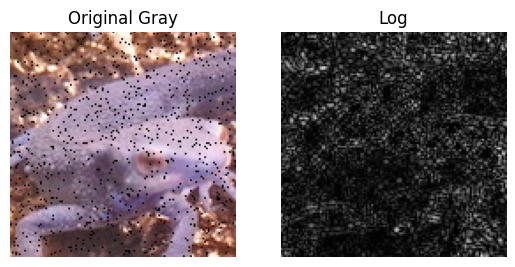

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# ---- Gray scale (BT.709) ----
def BGR2GRAY(img):
    b, g, r = img[..., 0], img[..., 1], img[..., 2]
    out = 0.2126 * r + 0.7152 * g + 0.0722 * b
    return out.astype(np.uint8)


# ---- LoG kernel ----
def LoG_kernel(K_size=5, sigma=3.0):
    pad = K_size // 2
    yy, xx = np.mgrid[-pad : pad + 1, -pad : pad + 1]
    # LoG formula
    norm = (xx**2 + yy**2 - sigma**2) / (2 * np.pi * (sigma**6))
    g = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    K = norm * g
    # 零均值化（輝度オフセットを防ぐ）
    K = K - K.mean()
    return K.astype(np.float32)


# ---- LoG filtering ----
def LoG_filter(gray, K_size=5, sigma=3.0, mode="abs", zc_thresh=0.0):
    """
    gray: uint8 (H,W)
    mode: "abs"  -> |LoG| を0-255へ正規化（可視化向け）
          "zc"   -> zero-crossingで二値エッジを出力
    zc_thresh: 零交差時のマグニチュード下限（ノイズ抑制）
    """
    if gray.ndim != 2:
        raise ValueError("LoG_filter expects a grayscale image (H,W).")

    K = LoG_kernel(K_size, sigma)
    # 卷积（反射边界更自然）
    resp = cv2.filter2D(
        gray.astype(np.float32),
        ddepth=cv2.CV_32F,
        kernel=K,
        borderType=cv2.BORDER_REFLECT,
    )

    if mode == "abs":
        # 绝对值 + 归一化到 0-255（可视化）
        resp_abs = np.abs(resp)
        out = cv2.normalize(resp_abs, None, 0, 255, cv2.NORM_MINMAX)
        return out.astype(np.uint8)

    elif mode == "zc":
        # 零交差：检测符号变化且幅度超过阈值
        sign = np.sign(resp)
        # 8邻域与中心符号相乘 < 0 表示有零交差
        zc = np.zeros_like(resp, dtype=np.uint8)
        for dy in (-1, 0, 1):
            for dx in (-1, 0, 1):
                if dx == 0 and dy == 0:
                    continue
                prod = sign * np.roll(np.roll(sign, dy, axis=0), dx, axis=1)
                cross = prod < 0
                if zc_thresh > 0:
                    mag = np.maximum(
                        np.abs(resp), np.abs(np.roll(np.roll(resp, dy, 0), dx, 1))
                    )
                    cross &= mag > zc_thresh
                zc |= cross.astype(np.uint8)
        return (zc * 255).astype(np.uint8)

    else:
        raise ValueError("mode must be 'abs' or 'zc'")


if __name__ == "__main__":
    img = cv2.imread(q11_20_image_noise_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    out = LoG_filter(img_gray)

    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap="gray")
    plt.title("Original Gray")
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(out, cmap="gray")
    plt.title("Log")
    plt.axis("off")
    plt.show()

Q.20. ヒストグラム表示

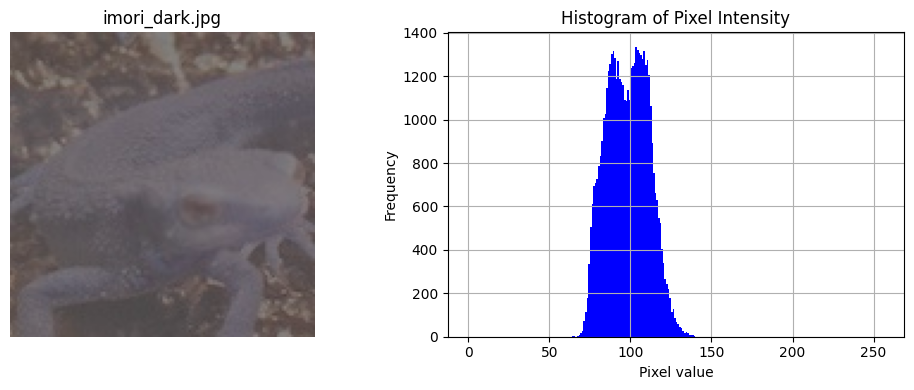

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 画像を読み込む（BGR形式）
img = cv2.imread(q11_20_image_dark_path)

# グレースケール化（ヒストグラムをわかりやすくする）
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ヒストグラムを計算
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# Matplotlibで表示
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("imori_dark.jpg")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.hist(img.ravel(), bins=256, range=(0, 256), color="blue")
plt.title("Histogram of Pixel Intensity")
plt.xlabel("Pixel value")
plt.ylabel("Frequency")
plt.grid(True)

plt.tight_layout()
plt.show()

Q21 ヒストグラム正規化

In [38]:
import os

proj_path = os.getcwd()

q21_30_image_path = os.path.join(proj_path, "Question_21_30", "imori.jpg")
print("Image path:", q21_30_image_path, "→ Exists:", os.path.exists(q21_30_image_path))

# q21_30_image_noise_path = os.path.join(proj_path, "Question_21_30", "imori_noise.jpg")
# print("Noisy image path:", q21_30_image_noise_path, "→ Exists:", os.path.exists(q21_30_image_noise_path))

q21_30_image_dark_path = os.path.join(proj_path, "Question_21_30", "imori_dark.jpg")
print(
    "Dark image path:",
    q21_30_image_dark_path,
    "→ Exists:",
    os.path.exists(q21_30_image_dark_path),
)

q21_30_image_gamma_path = os.path.join(proj_path, "Question_21_30", "imori_gamma.jpg")
print(
    "Gamma image path:",
    q21_30_image_gamma_path,
    "→ Exists:",
    os.path.exists(q21_30_image_gamma_path),
)

Image path: /Users/sakura/Documents/書類 - /LiveInJapan(2019/2025/0工作/ABIST/git源代码/Gasyori100knock-ying/Question_21_30/imori.jpg → Exists: True
Dark image path: /Users/sakura/Documents/書類 - /LiveInJapan(2019/2025/0工作/ABIST/git源代码/Gasyori100knock-ying/Question_21_30/imori_dark.jpg → Exists: True
Gamma image path: /Users/sakura/Documents/書類 - /LiveInJapan(2019/2025/0工作/ABIST/git源代码/Gasyori100knock-ying/Question_21_30/imori_gamma.jpg → Exists: True


/var/folders/gy/p5ls3lm94dzbkh1jbb17qp9h0000gn/T/ipykernel_18432/3012667751.py:35: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img.ravel(), 256, [0, 255], color="blue", alpha=0.5, label="Before")
/var/folders/gy/p5ls3lm94dzbkh1jbb17qp9h0000gn/T/ipykernel_18432/3012667751.py:36: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(out.ravel(), 256, [0, 255], color="red", alpha=0.5, label="After")


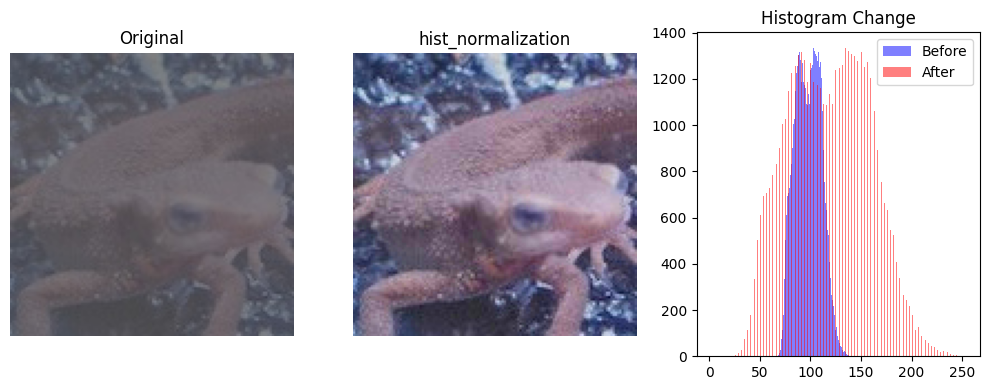

Before: mean=97.73, std=12.75
After:  mean=118.30, std=40.13


In [74]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def hist_normalization(img, a=0, b=255):
    """ヒストグラム正規化"""
    c = img.min()
    d = img.max()
    out = img.copy()
    out = (b - a) / (d - c) * (out - c) + a
    out[out < a] = a
    out[out > b] = b
    return out.astype(np.uint8)


if __name__ == "__main__":
    img = cv2.imread(q11_20_image_dark_path)  # BGR
    # 法1: カラー画像に対してそのまま適用
    out = hist_normalization(img)

    plt.figure(figsize=(10, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # 原图转RGB显示
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))  # 转RGB显示
    plt.title("hist_normalization")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.hist(img.ravel(), 256, [0, 255], color="blue", alpha=0.5, label="Before")
    plt.hist(out.ravel(), 256, [0, 255], color="red", alpha=0.5, label="After")

    plt.legend()
    plt.title("Histogram Change")

    plt.tight_layout()
    plt.show()

    print(f"Before: mean={np.mean(img):.2f}, std={np.std(img):.2f}")
    print(f"After:  mean={np.mean(out):.2f}, std={np.std(out):.2f}")

Q.22. ヒストグラム操作

/var/folders/gy/p5ls3lm94dzbkh1jbb17qp9h0000gn/T/ipykernel_18432/1437916439.py:33: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img.ravel(), 256, [0, 255], color="blue", alpha=0.5, label="Before")
/var/folders/gy/p5ls3lm94dzbkh1jbb17qp9h0000gn/T/ipykernel_18432/1437916439.py:34: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(out.ravel(), 256, [0, 255], color="red", alpha=0.5, label="After")


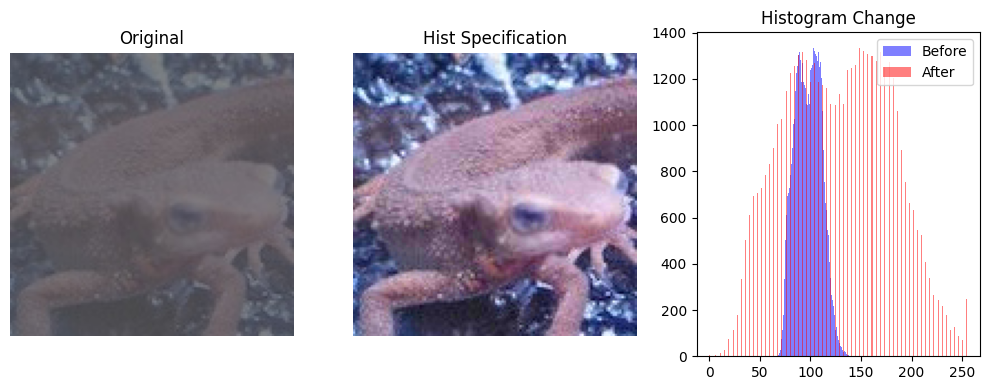

Before: mean=97.73, std=12.75
After:  mean=127.44, std=51.85


In [75]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def hist_specify(img, m0=128, s0=52):
    """ヒストグラム操作：平均値をm0、標準偏差をs0に変更"""
    m = np.mean(img)
    s = np.std(img)
    out = (img - m) * (s0 / (s + 1e-8)) + m0  # 防止除零
    return np.clip(out, 0, 255).astype(np.uint8)


if __name__ == "__main__":
    img = cv2.imread(q11_20_image_dark_path)  # BGR
    # 法1: カラー画像に対してそのまま適用
    out = hist_specify(img)

    plt.figure(figsize=(10, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))  # 转RGB显示

    plt.title("Hist Specification")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.hist(img.ravel(), 256, [0, 255], color="blue", alpha=0.5, label="Before")
    plt.hist(out.ravel(), 256, [0, 255], color="red", alpha=0.5, label="After")
    plt.legend()
    plt.title("Histogram Change")

    plt.tight_layout()
    plt.show()

    print(f"Before: mean={np.mean(img):.2f}, std={np.std(img):.2f}")
    print(f"After:  mean={np.mean(out):.2f}, std={np.std(out):.2f}")

Q.23. ヒストグラム平坦化

/var/folders/gy/p5ls3lm94dzbkh1jbb17qp9h0000gn/T/ipykernel_18432/449948386.py:42: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img.ravel(), 256, [0, 255], color="blue", alpha=0.5, label="Before")
/var/folders/gy/p5ls3lm94dzbkh1jbb17qp9h0000gn/T/ipykernel_18432/449948386.py:43: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(out.ravel(), 256, [0, 255], color="red", alpha=0.5, label="After")


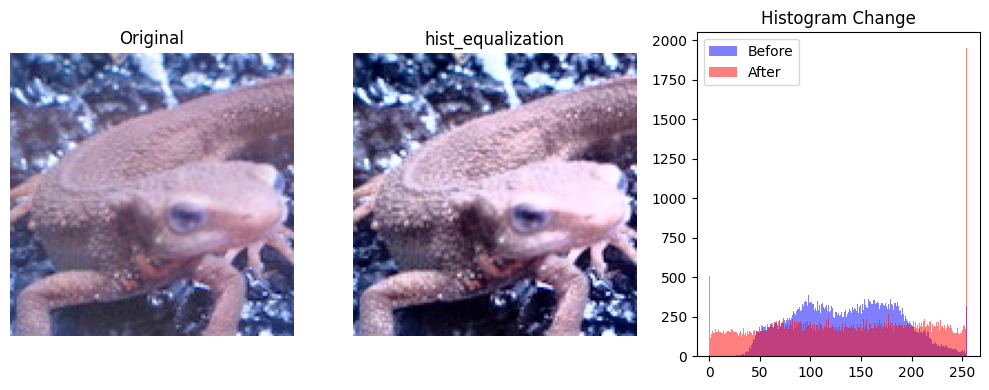

Before: mean=136.24, std=50.62
After:  mean=134.63, std=74.62


In [91]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def hist_equal_gray(gray):
    # gray: uint8, shape (H,W)
    hist = np.bincount(gray.ravel(), minlength=256)
    cdf = hist.cumsum()
    cdf_min = cdf[np.nonzero(cdf)][0]  # 首个非零
    lut = ((cdf - cdf_min) * 255 / (gray.size - cdf_min)).clip(0, 255).astype(np.uint8)
    return lut[gray]


def hist_equal_y(img_bgr):
    ycrcb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2YCrCb)
    y, cr, cb = cv2.split(ycrcb)
    y_eq = hist_equal_gray(y)  # 用上面的灰度均衡
    return cv2.cvtColor(cv2.merge([y_eq, cr, cb]), cv2.COLOR_YCrCb2BGR)


if __name__ == "__main__":
    img = cv2.imread(q11_20_image_path)  # BGR
    # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    out = hist_equal_y(img)
    # 法1: カラー画像に対してそのまま適用
    # out = hist_equalization(img)
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))  # 转RGB显示

    plt.title("hist_equalization")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.hist(img.ravel(), 256, [0, 255], color="blue", alpha=0.5, label="Before")
    plt.hist(out.ravel(), 256, [0, 255], color="red", alpha=0.5, label="After")
    plt.legend()
    plt.title("Histogram Change")

    plt.tight_layout()
    plt.show()

    print(f"Before: mean={np.mean(img):.2f}, std={np.std(img):.2f}")
    print(f"After:  mean={np.mean(out):.2f}, std={np.std(out):.2f}")

/var/folders/gy/p5ls3lm94dzbkh1jbb17qp9h0000gn/T/ipykernel_18432/1295196260.py:42: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img.ravel(), 256, [0, 255], alpha=0.5, label="Before")
/var/folders/gy/p5ls3lm94dzbkh1jbb17qp9h0000gn/T/ipykernel_18432/1295196260.py:43: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(out.ravel(), 256, [0, 255], alpha=0.5, label="After")


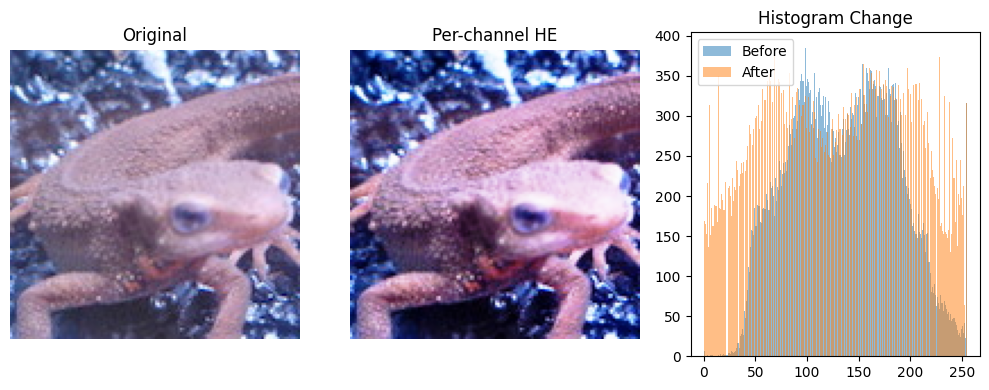

Before: mean=136.24, std=50.62
After:  mean=127.66, std=73.61


In [89]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# histogram equalization
def hist_equal(img, z_max=255):
    H, W, C = img.shape
    S = H * W * C * 1.0

    out = img.copy()

    sum_h = 0.0

    for i in range(1, 255):
        ind = np.where(img == i)
        sum_h += len(img[ind])
        z_prime = z_max / S * sum_h
        out[ind] = z_prime

    out = out.astype(np.uint8)

    return out


if __name__ == "__main__":
    img = cv2.imread(q11_20_image_path)  # BGR
    out = hist_equal(img)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
    plt.title("Per-channel HE")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.hist(img.ravel(), 256, [0, 255], alpha=0.5, label="Before")
    plt.hist(out.ravel(), 256, [0, 255], alpha=0.5, label="After")
    plt.legend()
    plt.title("Histogram Change")
    plt.tight_layout()
    plt.show()

    print(f"Before: mean={np.mean(img):.2f}, std={np.std(img):.2f}")
    print(f"After:  mean={np.mean(out):.2f}, std={np.std(out):.2f}")

Q.24. ガンマ補正

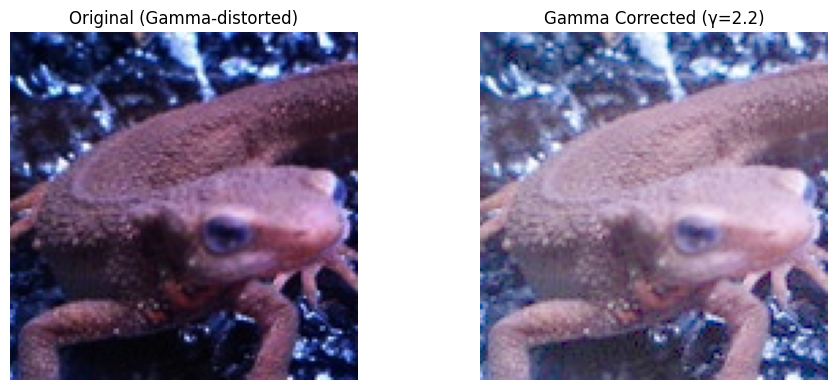

In [92]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def gamma_correction(img, c=1.0, gamma=2.2):
    """ガンマ補正"""
    # 归一化到[0,1]
    img_norm = img.astype(np.float32) / 255.0
    # 应用公式
    out = c * np.power(img_norm, 1.0 / gamma)
    # 映射回[0,255]
    out = np.clip(out * 255, 0, 255).astype(np.uint8)
    return out


if __name__ == "__main__":
    img = cv2.imread(q21_30_image_gamma_path)  # BGR
    out = gamma_correction(img, c=1.0, gamma=2.2)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original (Gamma-distorted)")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
    plt.title("Gamma Corrected (γ=2.2)")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

Q.25. 最近傍補間

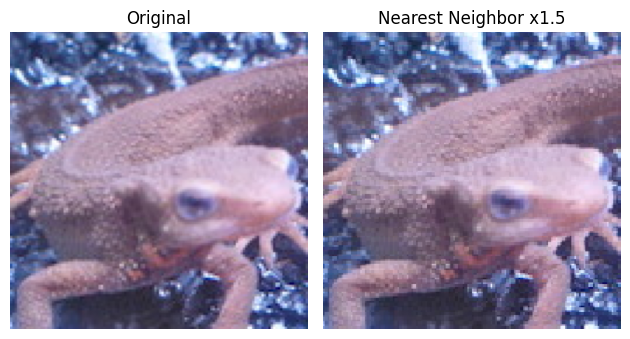

In [102]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def nearest_neighbor_interpolation(img, a=1.5):
    """最近傍補間による拡大"""
    H, W, C = img.shape
    new_H = int(H * a)
    new_W = int(W * a)
    out = np.zeros((new_H, new_W, C), dtype=np.uint8)

    for y_ in range(new_H):
        for x_ in range(new_W):
            # 对应到原图的坐标
            y = round(y_ / a)
            x = round(x_ / a)
            # 防止越界
            y = min(y, H - 1)
            x = min(x, W - 1)
            out[y_, x_] = img[y, x]
    return out


if __name__ == "__main__":
    img = cv2.imread(q21_30_image_path)  # BGR
    out = nearest_neighbor_interpolation(img, a=1.5)

    # plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), aspect="equal")
    plt.title("Original")
    plt.axis("off")
    # plt.show()
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB), aspect="equal")
    plt.title("Nearest Neighbor x1.5")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

Q.26. Bi-linear補間

Original shape: (128, 128, 3)
Scaled shape:   (192, 192, 3)


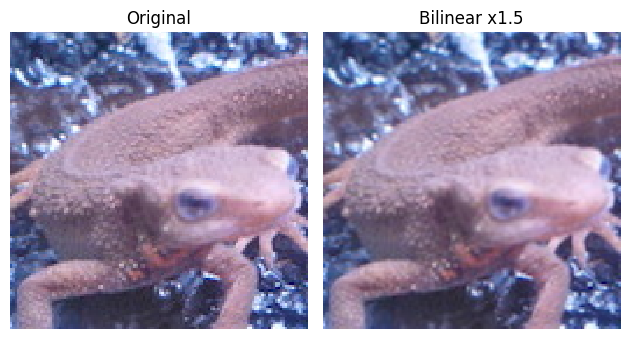

In [103]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def bilinear_resize(img, a=1.5):
    if img.ndim == 2:
        H, W = img.shape
        C = None
    else:
        H, W, C = img.shape

    new_H = int(round(H * a))
    new_W = int(round(W * a))

    out = (
        np.empty((new_H, new_W, C), dtype=np.float32)
        if C is not None
        else np.empty((new_H, new_W), dtype=np.float32)
    )

    for y2 in range(new_H):
        y_s = y2 / a
        y0 = int(np.floor(y_s))
        y1 = min(y0 + 1, H - 1)
        dy = y_s - y0
        for x2 in range(new_W):
            x_s = x2 / a
            x0 = int(np.floor(x_s))
            x1 = min(x0 + 1, W - 1)
            dx = x_s - x0
            w00 = (1 - dx) * (1 - dy)
            w10 = dx * (1 - dy)
            w01 = (1 - dx) * dy
            w11 = dx * dy

            if C is None:
                I00 = img[y0, x0]
                I10 = img[y0, x1]
                I01 = img[y1, x0]
                I11 = img[y1, x1]
            else:
                I00 = img[y0, x0, :].astype(np.float32)
                I10 = img[y0, x1, :].astype(np.float32)
                I01 = img[y1, x0, :].astype(np.float32)
                I11 = img[y1, x1, :].astype(np.float32)

            out[y2, x2] = w00 * I00 + w10 * I10 + w01 * I01 + w11 * I11

    return np.clip(out, 0, 255).astype(np.uint8)


# ---- 可视化（同一张 Figure，禁止中途 show）----
img = cv2.imread(q21_30_image_path)  # BGR
out = bilinear_resize(img, a=1.5)

print("Original shape:", img.shape)
print("Scaled shape:  ", out.shape)

fig, axs = plt.subplots(1, 2)

axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), interpolation="nearest")
axs[0].set_title("Original")
axs[0].set_aspect("equal")
axs[0].axis("off")

axs[1].imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB), interpolation="nearest")
axs[1].set_title("Bilinear x1.5")
axs[1].set_aspect("equal")
axs[1].axis("off")

plt.tight_layout()
plt.show()

Q.27. Bi-cubic補間

Original shape: (128, 128, 3)
Scaled shape:   (192, 192, 3)


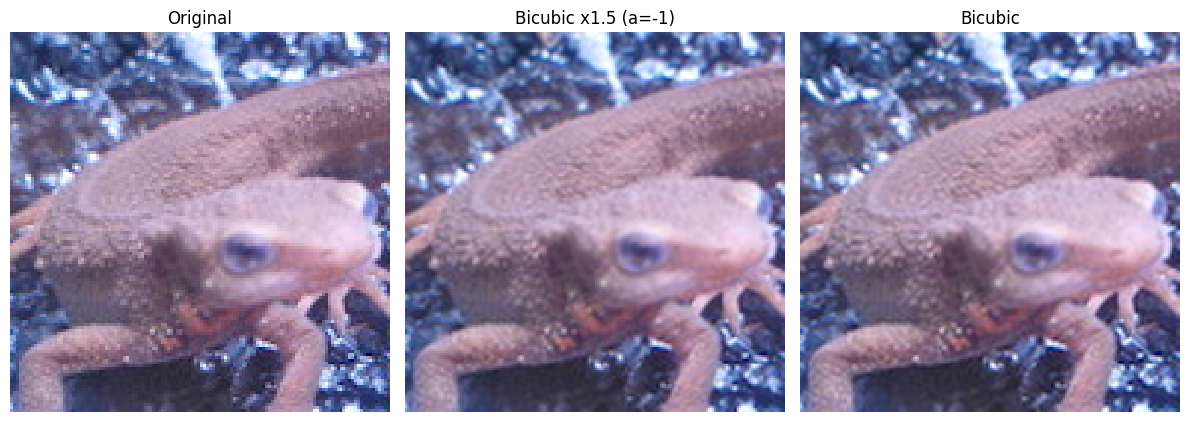

In [109]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Keys bicubic kernel
def cubic_kernel(t, a=-1.0):
    t = np.abs(t)
    t2 = t * t
    t3 = t2 * t
    k = np.zeros_like(t, dtype=np.float32)

    mask1 = t <= 1
    mask2 = (t > 1) & (t < 2)

    # (a+2)|t|^3 - (a+3)|t|^2 + 1, for |t| <= 1
    k[mask1] = ((a + 2) * t3 - (a + 3) * t2 + 1)[mask1]
    # a|t|^3 - 5a|t|^2 + 8a|t| - 4a, for 1 < |t| < 2
    k[mask2] = (a * t3 - 5 * a * t2 + 8 * a * t - 4 * a)[mask2]
    # else 0
    return k


def bicubic_resize(img, scale=1.5, a=-1.0):
    """双三次插值放大 (支持灰度/彩色)，a=-1（锐）/ -0.5（更平滑）"""
    is_gray = img.ndim == 2
    if is_gray:
        H, W = img.shape
        C = 1
        src = img[..., None]
    else:
        H, W, C = img.shape
        src = img

    new_H = int(round(H * scale))
    new_W = int(round(W * scale))
    out = np.zeros((new_H, new_W, C), dtype=np.float32)

    for y2 in range(new_H):
        y = y2 / scale
        y0 = int(np.floor(y))
        dy = y - y0

        # 原图参与的4个y坐标（边界 clamp）
        ys = np.clip(np.array([y0 - 1, y0, y0 + 1, y0 + 2]), 0, H - 1)
        wy = cubic_kernel(np.array([1 + dy, dy, 1 - dy, 2 - dy]), a=a)
        wy = wy / (wy.sum() + 1e-8)  # 正规化以避免极端处漂移

        for x2 in range(new_W):
            x = x2 / scale
            x0 = int(np.floor(x))
            dx = x - x0

            xs = np.clip(np.array([x0 - 1, x0, x0 + 1, x0 + 2]), 0, W - 1)
            wx = cubic_kernel(np.array([1 + dx, dx, 1 - dx, 2 - dx]), a=a)
            wx = wx / (wx.sum() + 1e-8)

            # 4x4邻域加权：先按x聚合，再按y聚合（或相反顺序都可）
            patch = src[ys[:, None], xs[None, :], :]  # (4,4,C)
            val_x = (patch * wx[None, :, None]).sum(axis=1)  # (4,C)
            val = (val_x * wy[:, None]).sum(axis=0)  # (C,)
            out[y2, x2, :] = val

    out = np.clip(out, 0, 255).astype(np.uint8)
    return out[..., 0] if is_gray else out


# Bi-cubic interpolation
def bc_interpolate(img, ax=1.0, ay=1.0):
    H, W, C = img.shape

    aH = int(ay * H)
    aW = int(ax * W)

    # get positions of resized image
    y = np.arange(aH).repeat(aW).reshape(aH, -1)
    x = np.tile(np.arange(aW), (aH, 1))
    y = y / ay
    x = x / ax

    # get positions of original image
    ix = np.floor(x).astype(np.intp)
    iy = np.floor(y).astype(np.intp)

    ix = np.minimum(ix, W - 1)
    iy = np.minimum(iy, H - 1)

    # get distance of each position of original image
    dx2 = x - ix
    dy2 = y - iy
    dx1 = dx2 + 1
    dy1 = dy2 + 1
    dx3 = 1 - dx2
    dy3 = 1 - dy2
    dx4 = 1 + dx3
    dy4 = 1 + dy3

    dxs = [dx1, dx2, dx3, dx4]
    dys = [dy1, dy2, dy3, dy4]

    # bi-cubic weight
    def weight(t):
        a = -1.0
        at = np.abs(t)
        w = np.zeros_like(t)
        ind = np.where(at <= 1)
        w[ind] = ((a + 2) * np.power(at, 3) - (a + 3) * np.power(at, 2) + 1)[ind]
        ind = np.where((at > 1) & (at <= 2))
        w[ind] = (a * np.power(at, 3) - 5 * a * np.power(at, 2) + 8 * a * at - 4 * a)[
            ind
        ]
        return w

    w_sum = np.zeros((aH, aW, C), dtype=np.float32)
    out = np.zeros((aH, aW, C), dtype=np.float32)

    # interpolate
    for j in range(-1, 3):
        for i in range(-1, 3):
            ind_x = np.minimum(np.maximum(ix + i, 0), W - 1)
            ind_y = np.minimum(np.maximum(iy + j, 0), H - 1)

            wx = weight(dxs[i + 1])
            wy = weight(dys[j + 1])
            wx = np.repeat(np.expand_dims(wx, axis=-1), 3, axis=-1)
            wy = np.repeat(np.expand_dims(wy, axis=-1), 3, axis=-1)

            w_sum += wx * wy
            out += wx * wy * img[ind_y, ind_x]

    out /= w_sum
    out = np.clip(out, 0, 255)
    out = out.astype(np.uint8)

    return out


# ===== 示例可视化 =====
if __name__ == "__main__":
    img = cv2.imread(q21_30_image_path)  # BGR
    out = bicubic_resize(img, scale=1.5, a=-0.5)  # 改成 a=-0.5 试试更平滑
    out2 = bc_interpolate(img.astype(np.float32), ax=1.5, ay=1.5)

    print("Original shape:", img.shape)
    print("Scaled shape:  ", out.shape)

    fig, axs = plt.subplots(1, 3, figsize=(12, 6))
    axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), interpolation="nearest")
    axs[0].set_title("Original")
    axs[0].set_aspect("equal")
    axs[0].axis("off")
    axs[1].imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB), interpolation="nearest")
    axs[1].set_title("Bicubic x1.5 (a=-1)")
    axs[1].set_aspect("equal")
    axs[1].axis("off")
    axs[2].imshow(cv2.cvtColor(out2, cv2.COLOR_BGR2RGB), interpolation="nearest")
    axs[2].set_title("Bicubic")
    axs[2].set_aspect("equal")
    axs[2].axis("off")
    plt.tight_layout()
    plt.show()

    # 你也可以用 OpenCV 的对比一下（应与本实现观感接近）
    # out_cv = cv2.resize(img, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)

Q.28. アフィン変換(平行移動)

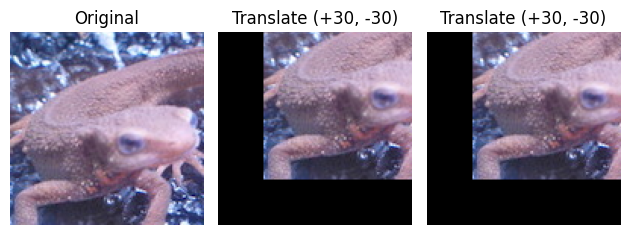

In [112]:
import cv2, numpy as np, matplotlib.pyplot as plt


def translate_inverse_map(img, tx=30, ty=-30, interp="nearest", border_value=0):
    H, W = img.shape[:2]
    out = np.full_like(img, border_value)
    # 逆変換：求每个输出像素在输入中的来源坐标
    for y2 in range(H):
        for x2 in range(W):
            x = x2 - tx
            y = y2 - ty
            if 0 <= x < W and 0 <= y < H:
                if interp == "nearest":
                    out[y2, x2] = img[int(round(y)), int(round(x))]
                elif interp == "bilinear":
                    x0, y0 = int(np.floor(x)), int(np.floor(y))
                    x1, y1 = min(x0 + 1, W - 1), min(y0 + 1, H - 1)
                    dx, dy = x - x0, y - y0
                    w00 = (1 - dx) * (1 - dy)
                    w10 = dx * (1 - dy)
                    w01 = (1 - dx) * dy
                    w11 = dx * dy
                    v = (
                        img[y0, x0] * w00
                        + img[y0, x1] * w10
                        + img[y1, x0] * w01
                        + img[y1, x1] * w11
                    )
                    out[y2, x2] = v.astype(img.dtype)
    return out


# demo
img = cv2.imread(q21_30_image_path)  # BGR
out = translate_inverse_map(img, tx=30, ty=-30, interp="nearest", border_value=0)
M = np.float32([[1, 0, 30], [0, 1, -30]])  # x' = x + 30  # y' = y - 30
out_cv2 = cv2.warpAffine(
    img,
    M,
    (img.shape[1], img.shape[0]),
    flags=cv2.INTER_NEAREST,  # 或 cv2.INTER_LINEAR
    borderMode=cv2.BORDER_CONSTANT,
    borderValue=0,
)
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.title("Translate (+30, -30)")
plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(out_cv2, cv2.COLOR_BGR2RGB))
plt.title("Translate (+30, -30)")
plt.axis("off")
plt.tight_layout()
plt.show()

Q.29. アフィン変換(拡大縮小)

(np.float64(-0.5), np.float64(165.5), np.float64(101.5), np.float64(-0.5))

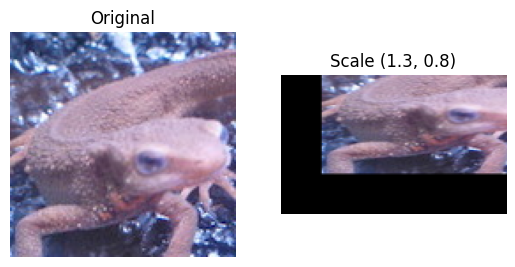

In [114]:
import cv2, numpy as np, matplotlib.pyplot as plt


# demo
img = cv2.imread(q21_30_image_path)  # BGR
H, W = img.shape[:2]

sx, sy = 1.3, 0.8
M1 = np.float32([[sx, 0, 0], [0, sy, 0]])

out1 = cv2.warpAffine(
    img,
    M1,
    (int(W * sx), int(H * sy)),
    flags=cv2.INTER_LINEAR,
    borderMode=cv2.BORDER_CONSTANT,
    borderValue=0,
)

tx, ty = 30, -30
M2 = np.float32([[sx, 0, tx], [0, sy, ty]])

out2 = cv2.warpAffine(
    img,
    M2,
    (int(W * sx), int(H * sy)),
    flags=cv2.INTER_LINEAR,
    borderMode=cv2.BORDER_CONSTANT,
    borderValue=0,
)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(out2, cv2.COLOR_BGR2RGB))
plt.title("Scale (1.3, 0.8)")
plt.axis("off")

Q.30. アフィン変換(回転)

(np.float64(-0.5), np.float64(173.5), np.float64(173.5), np.float64(-0.5))

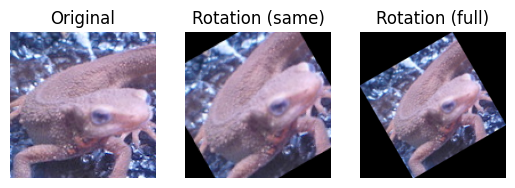

In [117]:
import cv2
import numpy as np
import math

img = cv2.imread(q21_30_image_path)  # BGR
H, W = img.shape[:2]
center = (W / 2, H / 2)

M1 = cv2.getRotationMatrix2D(center, 30, 1.0)  # 角度は度数法、正で反時計回り
rot_same = cv2.warpAffine(
    img,
    M1,
    (W, H),
    flags=cv2.INTER_LINEAR,
    borderMode=cv2.BORDER_CONSTANT,
    borderValue=0,
)

cx, cy = W / 2, H / 2
angle = 30
scale = 1.0

# 原始旋转矩阵（绕中心）
M2 = cv2.getRotationMatrix2D((cx, cy), angle, scale)

# 计算旋转后包围盒尺寸
rad = math.radians(angle)
abs_cos = abs(math.cos(rad))
abs_sin = abs(math.sin(rad))
newW = int(W * abs_cos + H * abs_sin)
newH = int(H * abs_cos + W * abs_sin)

# 调整平移量：让原中心映射到新画布中心
M2[0, 2] += newW / 2 - cx
M2[1, 2] += newH / 2 - cy

rot_full = cv2.warpAffine(
    img,
    M2,
    (newW, newH),
    flags=cv2.INTER_LINEAR,
    borderMode=cv2.BORDER_CONSTANT,
    borderValue=0,
)


plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(rot_same, cv2.COLOR_BGR2RGB))
plt.title("Rotation (same)")
plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(rot_full, cv2.COLOR_BGR2RGB))
plt.title("Rotation (full)")
plt.axis("off")